In [ ]:
system('sudo apt-get install r-cran-igraph', intern=TRUE)
system('sudo apt-get install r-cran-googledrive', intern=TRUE)
system('sudo apt-get install r-cran-httpuv', intern=TRUE)
system('sudo apt-get install r-cran-infotheo', intern=TRUE)

[1] "Reading package lists..."                                          
[2] "Building dependency tree..."                                       
[3] "Reading state information..."                                      
[4] "r-cran-igraph is already the newest version (1.4.2-1cran1.2004.0)."
[5] "0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded."

[1] "Reading package lists..."                                               
[2] "Building dependency tree..."                                            
[3] "Reading state information..."                                           
[4] "r-cran-googledrive is already the newest version (2.1.0-1cran1.2004.0)."
[5] "0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded."

[1] "Reading package lists..."                                          
[2] "Building dependency tree..."                                       
[3] "Reading state information..."                                      
[4] "r-cran-httpuv is already the newest version (1.6.9-1cran1.2004.0)."
[5] "0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded."

[1] "Reading package lists..."                                              
[2] "Building dependency tree..."                                           
[3] "Reading state information..."                                          
[4] "r-cran-infotheo is already the newest version (1.2.0.1-1cran1.2004.0)."
[5] "0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded."

In [ ]:
library("igraph")
library("googledrive")
library("httpuv")
library("infotheo")


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [ ]:
if (file.exists("/usr/local/lib/python3.7/dist-packages/google/colab/_ipython.py")) {
  install.packages("R.utils")
  library("R.utils")
  library("httr")
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check) 
  options(rlang_interactive=TRUE)
}

ERROR: ignored

In [ ]:
untar('gplus.tar.gz')

In [ ]:
file_path ="gplus/" 
edge_files = list.files(path=file_path,pattern="edges") 
circles_files = list.files(path=file_path,pattern="circles")
fts_files = list.files(path=file_path,pattern="feat")
initial_graph = list()
final_graph = list()
graph_circles = list()
ego_nodes = list()

In [ ]:
cnt = 0
node_names = c()
for(i in 1:length(edge_files)){
    # get node id
    node = strsplit(edge_files[i],".edges")[[1]]
    node_names <-c(node_names,node)
    #print(node)
    ego_nodes[i] = node
    fc = file(paste(file_path,node,".circles",sep=""),open="r") 
    if(length(fc)>0){
        file_lines <- readLines(fc)
        if(length(file_lines)>0){
            circles =list()
            for(j in 1:length(file_lines)){
                circle_users = strsplit(file_lines[j],"\t")
                circles[[j]] <- circle_users[[1]][-1]
              }
            # find users who have more than 2 circles
            if(length(circles)>2){
                cnt = cnt + 1
                initial_graph[[i]] <- read.graph(paste(file_path,edge_files[i],sep=""),format="ncol",directed=TRUE)
                graph_circles[[i]] <- circles
                graph_nodes <- V(initial_graph[[i]])
                print(length(graph_nodes))
                print(node)
                # add the core node to his neighbor list and construct the graph
                final_graph[[i]] <- add.vertices(initial_graph[[i]],1,name=node)
                core_index = which(V(final_graph[[i]])$name==node) 
                core_node_edges = list()
                ### add edges connecting to this core node
                for(k in 1:length(graph_nodes)){
                    core_node_edges = c(core_node_edges, c(core_index, k))
                }
                final_graph[[i]] <- add.edges(final_graph[[i]],core_node_edges)
            } 
        }
    }
    close(fc)
}

[1] 1187
[1] "100535338638690515335"
[1] 559
[1] "100962871525684315897"
[1] 2614
[1] "101130571432010257170"
[1] 1052
[1] "101185748996927059931"
[1] 2455
[1] "101263615503715477581"
[1] 3814
[1] "101373961279443806744"
[1] 488
[1] "101541879642294398860"
[1] 4712
[1] "101626577406833098387"
[1] 2224
[1] "102170431816592344972"
[1] 102
[1] "102615863344410467759"
[1] 1371
[1] "102778563580121606331"
[1] 2332
[1] "103236949470535942612"
[1] 2009
[1] "103892332449873403244"
[1] 452
[1] "104105354262797387583"
[1] 3091
[1] "104607825525972194062"
[1] 475
[1] "104672614700283598130"
[1] 1730
[1] "104987932455782713675"
[1] 4289
[1] "106186407539128840569"
[1] 4842
[1] "106228758905254036967"
[1] 4903
[1] "106382433884876652170"
[1] 1083
[1] "106837574755355833243"
[1] 4369
[1] "107040353898400532534"
[1] 2156
[1] "107203023379915799071"
[1] 2512
[1] "107223200089245371832"
[1] 562
[1] "107459220492917008623"
[1] 4362
[1] "107489144252174167638"
[1] 1743
[1] "108883879052307976051"
[1] 773

### Questioin 18:

In [ ]:
#q18
cat("there are ", length(edge_files),"nodes and there are ",cnt,"personal networks" )

there are  132 nodes and there are  57 personal networks

### Question 19:

[1] 69


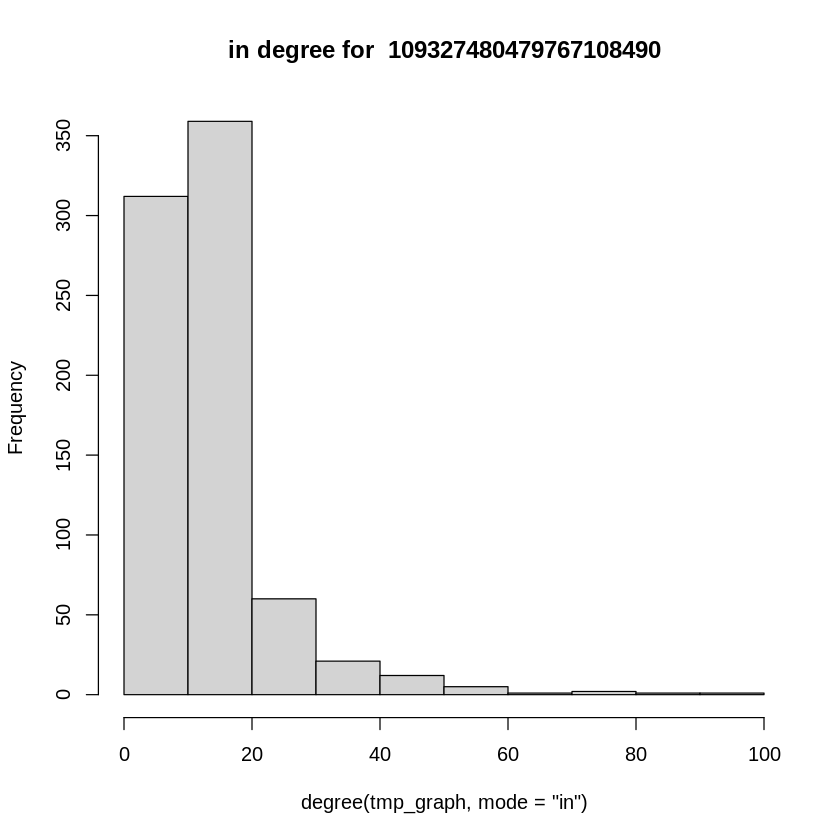

[1] 115


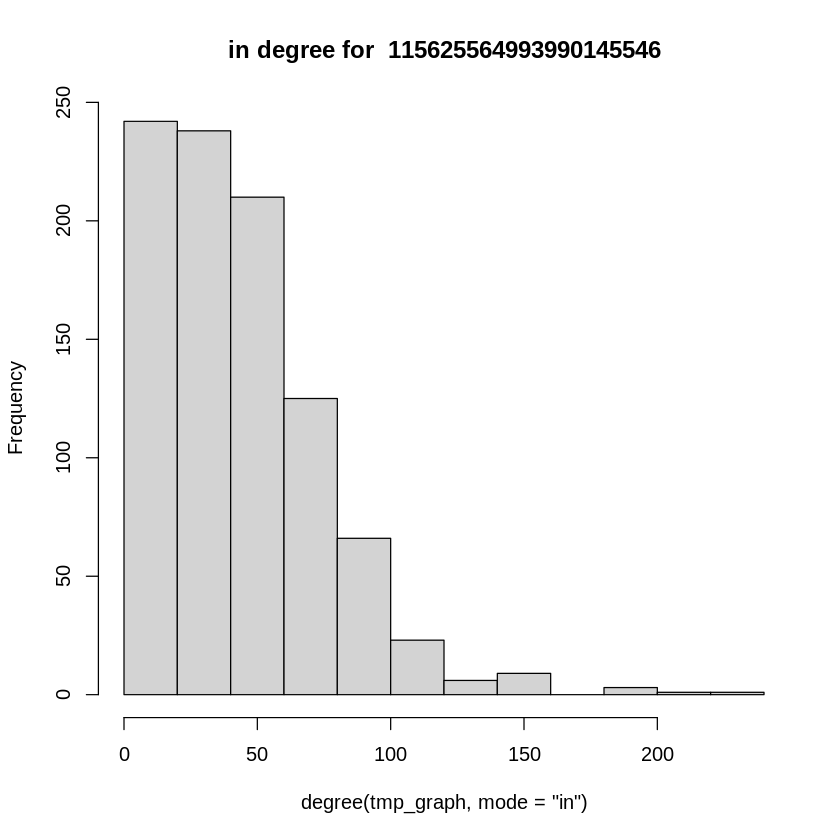

[1] 17


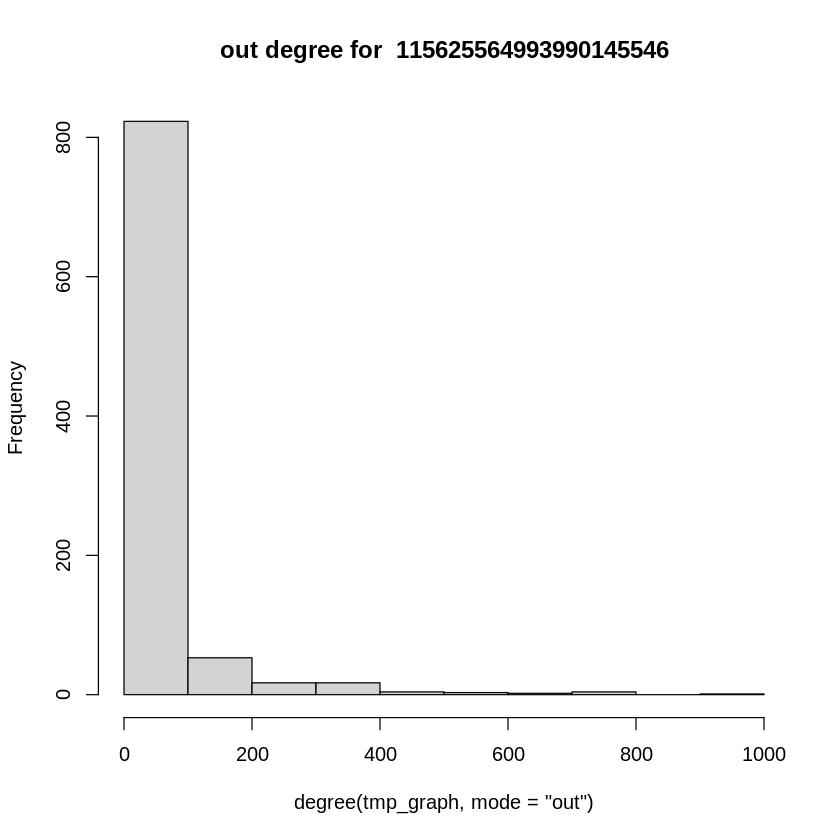

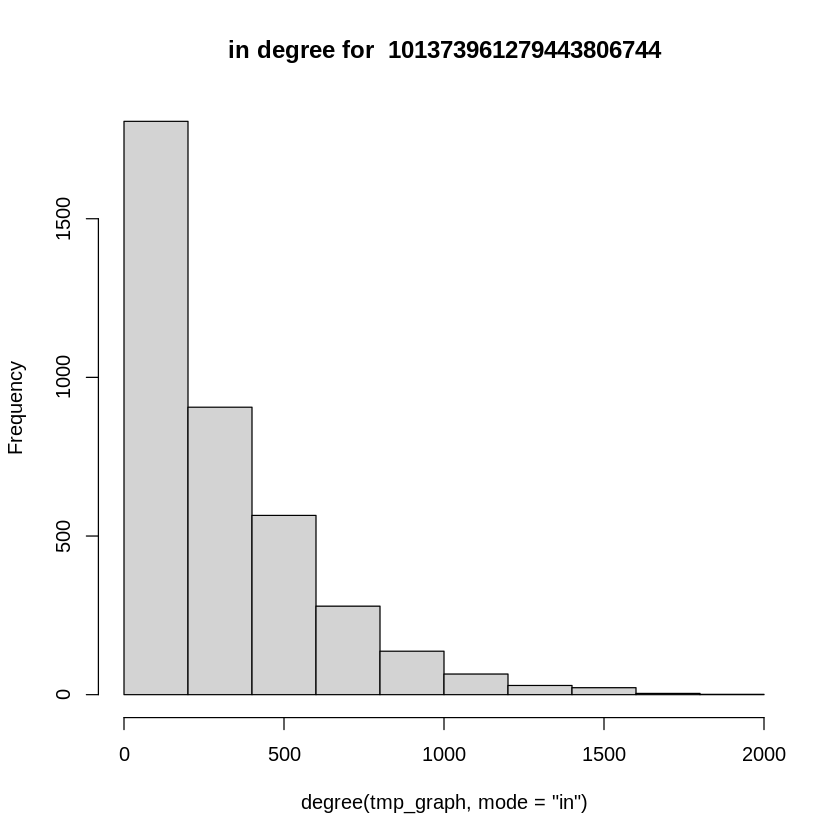

In [ ]:
#q19 
interest_node = c('109327480479767108490', '115625564993990145546','101373961279443806744')
graph_inds = c()
for (i in 1: length(interest_node)){
    graph_ind <- which(node_names==interest_node[i])
    graph_inds <- c(graph_inds, graph_ind)
    print(graph_ind)
    tmp_graph = final_graph[[graph_ind]]
    hist(degree(tmp_graph, mode="in"),main = paste("in degree for ", interest_node[i]))
    hist(degree(tmp_graph, mode="out"),main = paste("out degree for ", interest_node[i]))
}


### Question 20:


[1] "109327480479767108490"
[1] 0.2527654
[1] "115625564993990145546"
[1] 0.3194726


[1] "101373961279443806744"
[1] 0.1910903


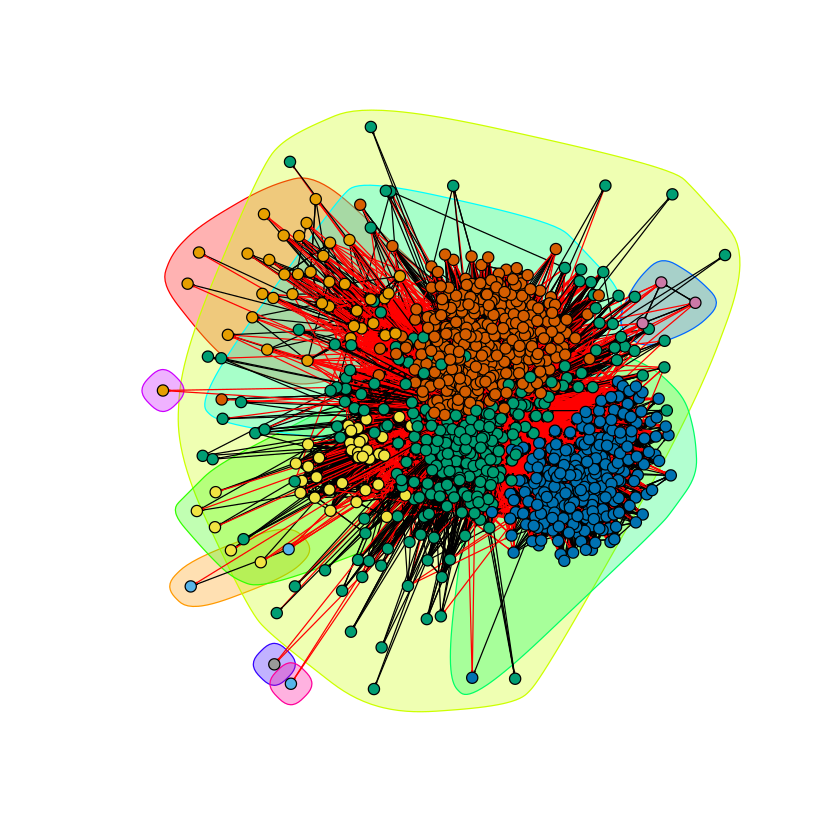

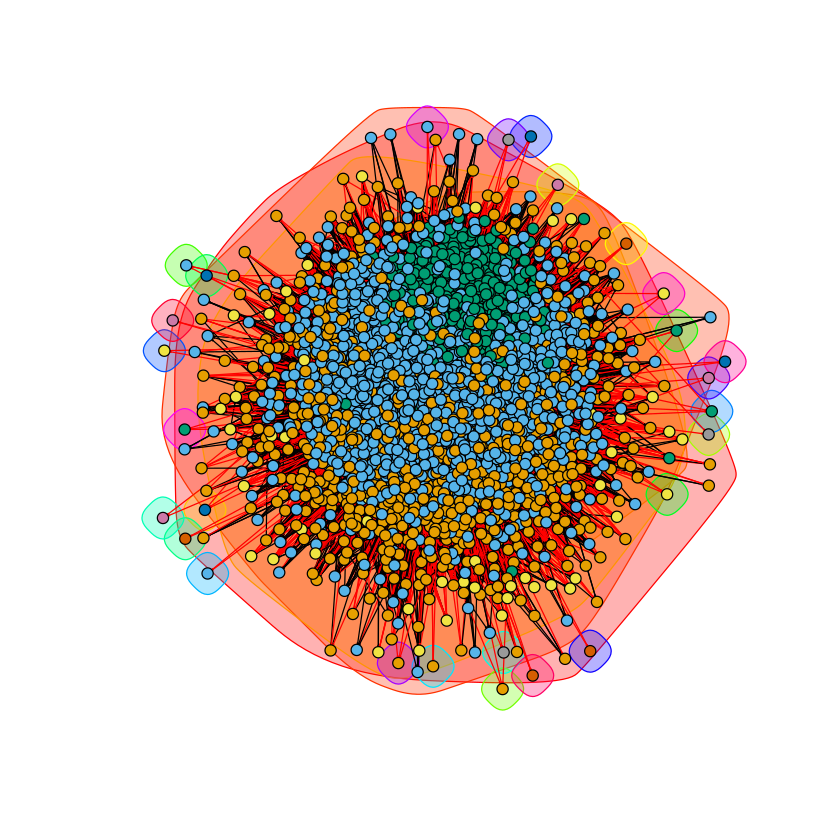

In [ ]:
interest_node = c('109327480479767108490', '115625564993990145546','101373961279443806744')
graph_inds = c()
for (i in 1: length(interest_node)){
    graph_ind <- which(node_names==interest_node[i])
    graph_inds <- c(graph_inds, graph_ind)
    
    tmp_graph = final_graph[[graph_ind]]
    csn = cluster_walktrap(tmp_graph)
    
    print(interest_node[i])
    print(modularity(csn))
    plot(csn, tmp_graph, col= membership(csn),vertex.label = NA,vertex.size = 4,edge.arrow.size = 0.05)

}

### Question 21:
Homogeneity: It shows whether the nodes in one cluster belong to the same class. The homogeneity will close to 1 if most of the nodes in the cluster are the same class. It indicates the purity of the cluster.

Completeness: It shows whether all the nodes belong to the same class are assgined to the same cluster. The completeness will close to 1 if all the clusters has been assigned by different and complete classes.

### Question 22:

In [ ]:
interest_node = c('109327480479767108490','115625564993990145546','101373961279443806744')
graph_inds = c()


for (i in 1: length(interest_node)){
    
    fc = file(paste(file_path,interest_node[i],".circles",sep=""),open="r") 
    file_lines = readLines(fc)


    circles = list()
    for (j in 1:length(file_lines)) {
        circle_nodes = strsplit(file_lines[j],"\t")
        circles = c(circles, list(circle_nodes[[1]][-1]))
    }
    

    all_nodes <- unique(unlist(circles))

    N <- length(all_nodes)

    entropy_c <- -sum((lengths(circles)/N) * log10(lengths(circles)/N))
    

    
    initial_graph[[i]] <- read.graph(paste(file_path, interest_node[i], ".edges",sep=""),format="ncol",directed=TRUE)
    graph_nodes <- V(initial_graph[[i]])
    final_graph[[i]] <- add.vertices(initial_graph[[i]],1,name=interest_node[i])
    core_index = which(V(final_graph[[i]])$name==interest_node[i])
    core_node_edges = list()


    for (k in 1:length(graph_nodes)) {
        core_node_edges = c(core_node_edges, c(core_index, k))
    }
    final_graph[[i]] = add_edges(final_graph[[i]], core_node_edges)
    community = walktrap.community(final_graph[[i]])
    
     
    
    entropy_ck=0
    entropy_kc=0
    
    
    mc = membership(community)

    entropy_k= 0


    ai = lengths(circles)

    bi = list()
    
    for(sumi in 1:length(mc)){


        b_i[sumi]=length(intersect(V(final_graph[[i]])$name[which(mc == sumi)],all_nodes))

        if(b_i[sumi]>0) {
            entropy_k =  entropy_k - ((b_i[sumi]/N) * log10(b_i[sumi]/N))

          
        }
    }


    for(sumi in 1:length(mc)){


      for (j in 1:length(circles)) {
          
          c_ij=length(intersect(V(final_graph[[i]])$name[which(mc == sumi)], circles[[j]]))
          
          if(c_ij>0){
              entropy_ck = entropy_ck - ((c_ij/N)*log10(c_ij/b_i[sumi]))
              entropy_kc = entropy_kc - ((c_ij/N)*log10(c_ij/ai[j]))
          }
      }
        
    }
    
    
    
    
    cat(interest_node[i])
    cat("\n")
    cat("Homogeneity: " ,  1 - (entropy_ck/entropy_c))
    cat("\n")
    cat("Completeness: ",(1 - (entropy_kc/entropy_k)))
    cat("\n")
    
   
    
    
}

109327480479767108490
Homogeneity:  0.8518851
Completeness:  0.3298739
115625564993990145546
Homogeneity:  0.4518903
Completeness:  -3.423962
101373961279443806744
Homogeneity:  0.003866707
Completeness:  -1.504238


[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following NEW packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
 [5] "  r-cran-kernlab"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
 [6] "0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
 [7] "Need to get 2,107 kB of archives."                                                                                     